In [1]:
## This is my first ANN implementation

## import packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
## import data

data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
## basic information extractinf got the dataset

data.shape

(10000, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
## gereration the feature metrx

X = data.iloc[:, 3:-1].values

In [9]:
## generate yje independed variable form the column 3 to last second

X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [10]:
## creating the dependent variable

Y = data.iloc[:,-1].values

In [11]:
Y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [12]:
## we need to process the cetagorical variable before train our model. 

from sklearn.preprocessing import LabelEncoder

LabelEncoder = LabelEncoder()
X[:,2] = np.array(LabelEncoder.fit_transform(X[:,2]))

In [15]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [18]:
X.shape

(10000, 12)

In [19]:
## spliting the dataset for train and test process

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100)

In [21]:
## performaing the feature scaling

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [22]:
## model building

ann = tf.keras.models.Sequential()

In [24]:
## Adding First Hidden layer

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [ ]:
## adding second layer

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [26]:
## adding output layers

ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [27]:
## compile the network

ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
## fitting model

history = ann.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test, Y_test))

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3335 - accuracy: 0.8629 - val_loss: 50380.6484 - val_accuracy: 0.4705
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8620 - val_loss: 53504.2812 - val_accuracy: 0.4655
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8618 - val_loss: 53129.5078 - val_accuracy: 0.2145
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8635 - val_loss: 52024.7031 - val_accuracy: 0.4700
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8633 - val_loss: 52518.0117 - val_accuracy: 0.4700
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3332 - accuracy: 0.8629 - val_loss: 54679.1992 - val_accuracy: 0.2110
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8633 - val_loss: 49950

250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8635 - val_loss: 59051.5742 - val_accuracy: 0.2060
Epoch 57/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8625 - val_loss: 54417.4961 - val_accuracy: 0.2080
Epoch 58/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3333 - accuracy: 0.8626 - val_loss: 54485.0430 - val_accuracy: 0.2080
Epoch 59/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8625 - val_loss: 53582.7266 - val_accuracy: 0.2120
Epoch 60/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8627 - val_loss: 53098.4336 - val_accuracy: 0.2120
Epoch 61/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3331 - accuracy: 0.8637 - val_loss: 55766.5234 - val_accuracy: 0.2080
Epoch 62/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3329 - accuracy: 0.8634 - val_loss: 53619.5859 

In [37]:
print(ann.predict(sc.transform([[1, 0, 0, 600000, 1, 40, 3, 6000, 2, 1, 1, 5000]])))


[[0.]]


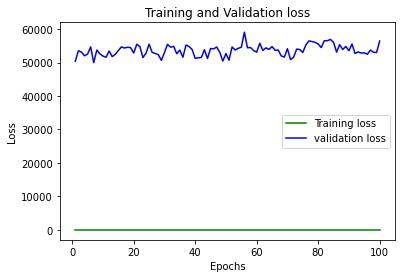

In [49]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,101)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<h1><center>First Example Ends</center></h1>